In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif'] = "Myriad Pro"

In [2]:
filename = 'FigS6_data.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names)

['figS6_raw_data']


In [3]:
raw_od = xl.parse('figS6_raw_data', index_col = None, header = None, skiprows = 50).iloc[:84,:170]
display(raw_od.head())
display(raw_od.tail())

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,A1,0.0506,0.0505,0.0506,0.0506,0.0507,0.0509,0.0513,0.0516,0.0522,...,0.5078,0.5096,0.5116,0.5135,0.5150,0.5164,0.5177,0.5195,0.5204,0.5215
1,A2,0.0513,0.0513,0.0513,0.0513,0.0514,0.0516,0.0520,0.0523,0.0528,...,0.5064,0.5078,0.5098,0.5115,0.5127,0.5141,0.5154,0.5170,0.5182,0.5194
2,A3,0.0514,0.0515,0.0515,0.0515,0.0517,0.0520,0.0522,0.0525,0.0531,...,0.5441,0.5462,0.5486,0.5505,0.5512,0.5526,0.5537,0.5554,0.5557,0.5566
3,A4,0.0518,0.0519,0.0519,0.0519,0.0521,0.0522,0.0526,0.0529,0.0534,...,0.5551,0.5572,0.5595,0.5614,0.5624,0.5637,0.5650,0.5668,0.5672,0.5685
4,A5,0.0523,0.0525,0.0525,0.0525,0.0526,0.0528,0.0531,0.0535,0.0541,...,0.4967,0.4991,0.5017,0.5038,0.5052,0.5074,0.5090,0.5110,0.5120,0.5138


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
79,G8,0.0500,0.0529,0.0531,0.0528,0.0533,0.0535,0.0536,0.0536,0.0536,...,0.6230,0.6270,0.6285,0.6306,0.6336,0.6365,0.6392,0.6422,0.6459,0.6474
80,G9,0.0500,0.0528,0.0530,0.0528,0.0532,0.0534,0.0535,0.0535,0.0535,...,0.5577,0.5612,0.5627,0.5651,0.5690,0.5723,0.5758,0.5792,0.5828,0.5852
81,G10,0.0502,0.0530,0.0532,0.0530,0.0534,0.0538,0.0537,0.0537,0.0537,...,0.5734,0.5773,0.5795,0.5822,0.5860,0.5905,0.5929,0.5964,0.6003,0.6031
82,G11,0.0497,0.0524,0.0526,0.0524,0.0528,0.0531,0.0532,0.0533,0.0531,...,0.5897,0.5934,0.5956,0.5985,0.6015,0.6044,0.6068,0.6099,0.6126,0.6148
83,G12,0.0489,0.0516,0.0518,0.0517,0.0524,0.0523,0.0524,0.0524,0.0523,...,0.5720,0.5748,0.5752,0.5770,0.5795,0.5818,0.5834,0.5864,0.5882,0.5899


In [4]:
time = xl.parse('figS6_raw_data', index_col = None, header = None, skiprows = 48).iloc[0,1:170]
time = time/3600
time


1            0.0
2          0.167
3       0.333694
4       0.500389
5       0.667083
         ...    
165    27.336694
166    27.503389
167    27.670083
168    27.836778
169    28.003444
Name: 0, Length: 169, dtype: object

In [5]:
# transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

strain = np.repeat([
    np.array(['sp', 'Msp1', 'Msp2', 'Msp3', 'pCas9 + pgRNA', 'pCas9 + ptetsp-J23119-gfp-ssrA', 'NT'])
], 12)

atcs = np.tile(np.array([0,0,0,0,0,0,0,0,100,100,100,100]),7)

kans = np.tile(np.array([0,0,0,0,50,50,50,50,50,50,50,50]), 7)

media = np.tile(np.repeat(np.array(['Cm', 'Cm + Kan', 'Cm + Kan + ATc']), 4), 7)

replicateID = np.tile(np.array([1,2,3,4]), 21)

od.insert(1, 'strain', strain)
od.insert(1, 'ATc', atcs)
od.insert(1, 'Kan', kans)
od.insert(1, 'media', media)
od.insert(1, 'replicate', replicateID)

# onto long form
od_long = pd.melt(od, id_vars = ['wellID','strain','ATc','Kan','media','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'hours'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.hours = od_long.hours.astype(float)

od_long


,wellID,strain,ATc,Kan,media,replicate,hours,OD600
0,A1,sp,0,0,Cm,1,0.000000,0.0506
1,A2,sp,0,0,Cm,2,0.000000,0.0513
2,A3,sp,0,0,Cm,3,0.000000,0.0514
3,A4,sp,0,0,Cm,4,0.000000,0.0518
4,A5,sp,0,50,Cm + Kan,1,0.000000,0.0523
...,...,...,...,...,...,...,...,...
14191,G8,NT,0,50,Cm + Kan,4,28.003444,0.6474
14192,G9,NT,100,50,Cm + Kan + ATc,1,28.003444,0.5852
14193,G10,NT,100,50,Cm + Kan + ATc,2,28.003444,0.6031
14194,G11,NT,100,50,Cm + Kan + ATc,3,28.003444,0.6148


In [6]:
def growth_rate(df, lower_od, upper_od):
    # df contains all wells for each variant 
    # calculates growth rate (for each replicates)
    # outputs a new dataframe (new_df) whose final column is the calculated growth rate for each replicate
    # also outputs the actual OD values and the corresponding time from which the growth rates are calculated (sanity check)

    # target OD's 
    # upper_od = 0.2
    # lower_od = 0.1
    
    # extract unique wellID's so we can iterate over them
    unique_wellID = df.wellID.unique()
    
    # initialize output
    hour_p2 = np.zeros(len(unique_wellID)) # times at which OD600 crosses 0.2
    hour_p1 = np.zeros(len(unique_wellID)) # times at which OD600 crosses 0.1

    # iterate and extract desired values 
    for i,u in enumerate(unique_wellID):
        well_df = df[df['wellID']==u]
        
        od_high_p2 = well_df[well_df['OD600']>=upper_od]['OD600'].iloc[0] # smallest OD that's equal to or greater than upper_od
        od_low_p2 = well_df[well_df['OD600']<=upper_od]['OD600'].iloc[-1] # largest OD that's equal to or smaller than upper_od
        t_high_p2 = well_df[well_df['OD600']>=upper_od]['hours'].iloc[0]
        t_low_p2 = well_df[well_df['OD600']<=upper_od]['hours'].iloc[-1]
        
        upper_t = np.interp(upper_od, [od_low_p2, od_high_p2],[t_low_p2, t_high_p2])
        hour_p2[i] = upper_t
        
        od_high_p1 = well_df[well_df['OD600']>=lower_od]['OD600'].iloc[0] # smallest OD that's equal to or greater than lower_od
        od_low_p1 = well_df[well_df['OD600']<=lower_od]['OD600'].iloc[-1] # largest OD that's equal to or smaller than lower_od
        t_high_p1 = well_df[well_df['OD600']>=lower_od]['hours'].iloc[0]
        t_low_p1 = well_df[well_df['OD600']<=lower_od]['hours'].iloc[-1]

        lower_t = np.interp(lower_od, [od_low_p1, od_high_p1],[t_low_p1, t_high_p1])
        hour_p1[i] = lower_t
    
    # calculate growth rates 
    hour_diff = hour_p2 - hour_p1
    gr_rate = np.log(upper_od/lower_od)/hour_diff

    new_df = df[['wellID','strain','ATc','Kan','media','replicate']].drop_duplicates()
    new_df['growth_rate'] = gr_rate
    
    # return [new_df, hour_p2, hour_p1, od_p2, od_p1]
    return new_df


In [7]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.05
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


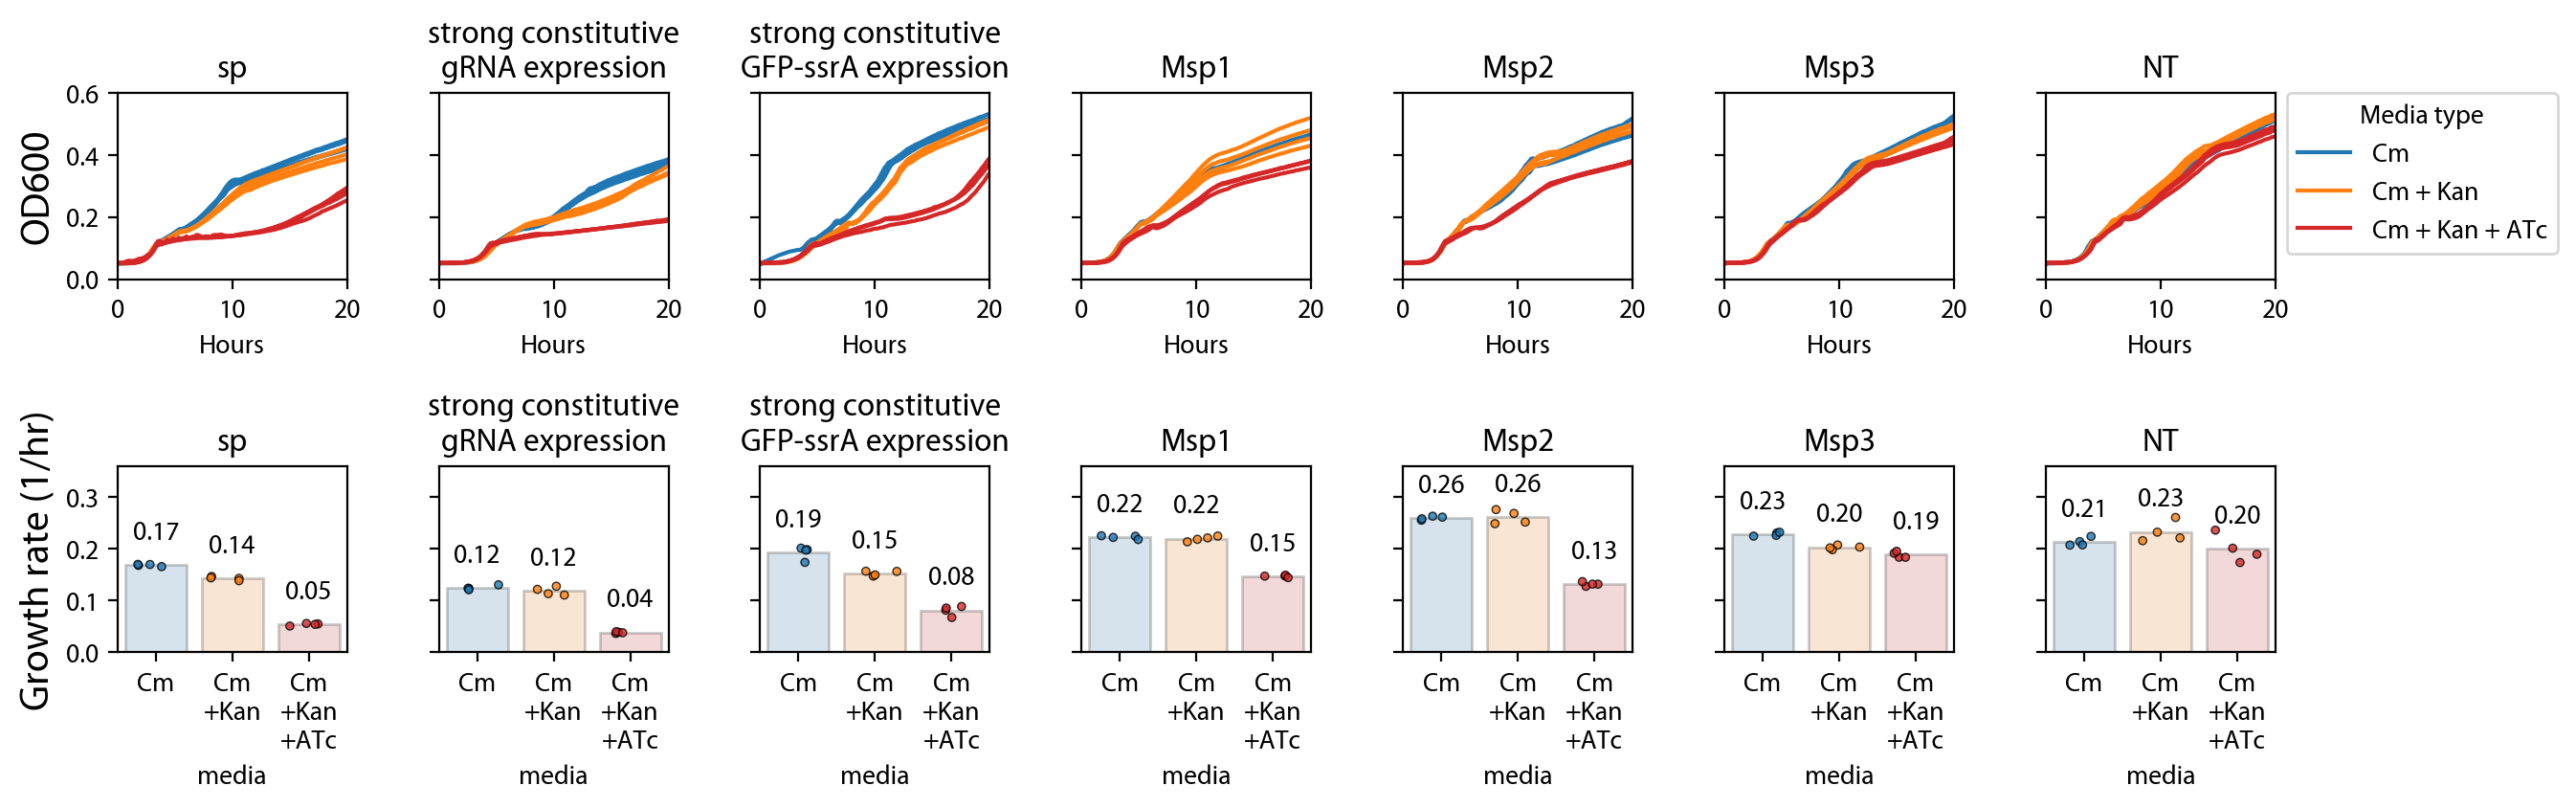

In [8]:
fig, axes = plt.subplots(2,7, figsize = (12,3.5), sharey = 'row', sharex = 'row', dpi=200)
plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace = 0.4)

df = od_long

pal = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[3]]

st_order = np.array(['sp', 'pCas9 + pgRNA', 'pCas9 + ptetsp-J23119-gfp-ssrA', 'Msp1', 'Msp2', 'Msp3', 'NT'])

for st, ax in zip(st_order,axes.flatten()[:7]):
    sns.lineplot(data = df[(df['strain']==st)&(df['media']!='Cm + ATc')], 
                x = 'hours', y = 'OD600', estimator = None, ax = ax, units = 'wellID',
                  hue = 'media', palette=pal, )

    ax.set_title(st)
    ax.set_xlim([0, 20])
    ax.set_ylim([0, .6])
    ax.get_legend().remove()
    ax.set_xlabel('Hours')

axes[0,0].set_ylabel('OD600', fontsize = 15)
axes[0,6].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Media type')

for c, ax in zip(st_order,axes.flatten()[7:]):

    df = growth_rate(od_long[(od_long['strain'] == c)&(od_long['media']!='Cm + ATc')], 0.1, 0.2)

    sns.barplot(data = df, x = 'media', y = 'growth_rate', errorbar=None, ax=ax, hue = 'media', palette=pal, alpha = 0.2, edgecolor = 'black')
    sns.stripplot(data = df, x = 'media', y = 'growth_rate', hue = 'media', ax = ax, palette=pal, 
                edgecolor = 'black', linewidth = 0.5, s = 3, alpha = 0.8, jitter = .3)
    ax.set_title(c, fontsize = 12)
    ax.set_ylim([0, 0.36])
    ax.set_yticks([0, 0.1, 0.2, 0.3])
    ax.set_ylabel('\nGrowth rate (1/hr)', fontsize = 15)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(['Cm', 'Cm\n+Kan', 'Cm\n+Kan\n+ATc'])
    # ax.set_xlabel('Media type')
    show_values_on_bars(ax)
axes[1,0].set_ylabel('Growth rate (1/hr)', fontsize = 15)

axes[0,1].set_title('strong constitutive\ngRNA expression', fontsize  = 12)
axes[0,2].set_title('strong constitutive\nGFP-ssrA expression', fontsize  = 12)
axes[1,1].set_title('strong constitutive\ngRNA expression', fontsize  = 12)
axes[1,2].set_title('strong constitutive\nGFP-ssrA expression', fontsize  = 12)

plt.show()
